In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

| Column | Description |
| --- | --- |
ID                          | User ID
Year Birth                  | User Birth Year
Education                   | User Education
Marital Status              | User Marital Status
Income                      | User Income ($)
Dt_Custom                   | Date of customer's enrollment with the company
Recency                     | Number of days since customer's last purchase
MntWines                    | Amount spent on wine in the last 2 years 
MntFruits                   | Amount spent on fruits in the last 2 years
MntMeatProducts             | Amount spent on meat in the last 2 years
MntFishProducts             | Amount spent on fish in the last 2 years
NumWebPurchases             | Number of purchases made through the company's web site
NumWebVisitsMonth           | Number of visits to company's web site in the last month
AcceptedCmp3                | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4                | 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5                | 1 if customer accepted the offer in the 5th campaign, 0 otherwise
AcceptedCmp1                | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp2                | 1 if customer accepted the offer in the 1st campaign, 0 otherwise



### - Check general structure of dataset

In [2]:
df = pd.read_excel('marketing_data.xlsx',engine='openpyxl').copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0


In [3]:
df.shape

(2240, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Education          2240 non-null   object
 3   Marital_Status     2240 non-null   object
 4    Income            2216 non-null   object
 5   Dt_Customer        2240 non-null   object
 6   Recency            2240 non-null   int64 
 7   MntWines           2240 non-null   int64 
 8   MntFruits          2240 non-null   int64 
 9   MntMeatProducts    2240 non-null   int64 
 10  MntFishProducts    2240 non-null   int64 
 11  NumWebPurchases    2240 non-null   int64 
 12  NumWebVisitsMonth  2240 non-null   int64 
 13  AcceptedCmp3       2240 non-null   int64 
 14  AcceptedCmp4       2240 non-null   int64 
 15  AcceptedCmp5       2240 non-null   int64 
 16  AcceptedCmp1       2240 non-null   int64 


### Structure of non-numerical features

In [5]:
# Display non-numerical features
df.select_dtypes(exclude="number").head()

,Education,Marital_Status,Income,Dt_Customer
0,Graduation,Divorced,"$84,835.00",6/16/14
1,Graduation,Single,"$57,091.00",6/15/14
2,Graduation,Married,"$67,267.00",5/13/14
3,Graduation,Together,"$32,474.00",5/11/14
4,Graduation,Single,"$21,474.00",4/8/14


In [6]:
df.describe(exclude="number")

,Education,Marital_Status,Income,Dt_Customer
count,2240,2240,2216,2240
unique,5,8,1974,663
top,Graduation,Married,"$7,500.00",8/31/12
freq,1127,864,12,12


### Structure of numerical feature

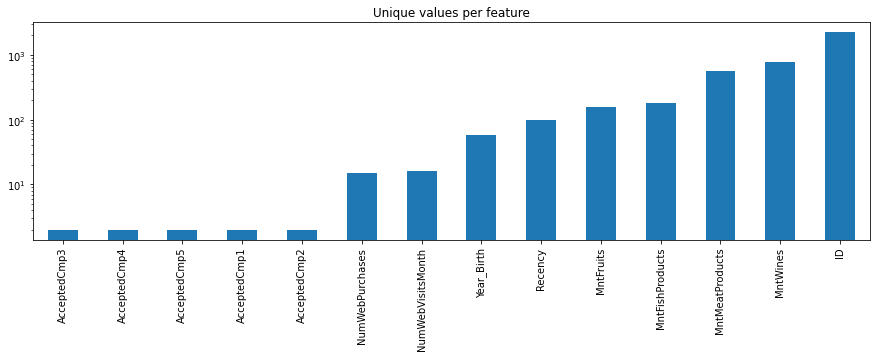

In [7]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Education          2240 non-null   object
 3   Marital_Status     2240 non-null   object
 4    Income            2216 non-null   object
 5   Dt_Customer        2240 non-null   object
 6   Recency            2240 non-null   int64 
 7   MntWines           2240 non-null   int64 
 8   MntFruits          2240 non-null   int64 
 9   MntMeatProducts    2240 non-null   int64 
 10  MntFishProducts    2240 non-null   int64 
 11  NumWebPurchases    2240 non-null   int64 
 12  NumWebVisitsMonth  2240 non-null   int64 
 13  AcceptedCmp3       2240 non-null   int64 
 14  AcceptedCmp4       2240 non-null   int64 
 15  AcceptedCmp5       2240 non-null   int64 
 16  AcceptedCmp1       2240 non-null   int64 


### - Check general quality of dataset

- Null values

In [9]:
# Check null values
df[df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
134,8996,1957,PhD,Married,NaN,11/19/12,4,230,42,192,49,7,9,0,0,0,0,0
262,1994,1983,Graduation,Married,NaN,11/15/13,11,5,5,6,0,1,7,0,0,0,0,0
394,3769,1972,PhD,Together,NaN,3/2/14,17,25,1,13,0,1,7,0,0,0,0,0
449,5255,1986,Graduation,Single,NaN,2/20/13,19,5,1,3,3,27,1,0,0,0,0,0
525,8268,1961,PhD,Married,NaN,7/11/13,23,352,0,27,10,6,6,0,0,0,0,0
590,10629,1973,2n Cycle,Married,NaN,9/14/12,25,25,3,43,17,3,8,0,0,0,0,0
899,10475,1970,Master,Together,NaN,4/1/13,39,187,5,65,26,4,5,0,0,0,0,0
997,9235,1957,Graduation,Single,NaN,5/27/14,45,7,0,8,2,1,7,0,0,0,0,0
1096,4345,1964,2n Cycle,Single,NaN,1/12/14,49,5,1,9,2,1,7,0,0,0,0,0
1185,7187,1969,Master,Together,NaN,5/18/13,52,375,42,48,94,4,3,0,0,0,0,0


In [10]:
# Impute or drop data
df=df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2216 non-null   int64 
 1   Year_Birth         2216 non-null   int64 
 2   Education          2216 non-null   object
 3   Marital_Status     2216 non-null   object
 4    Income            2216 non-null   object
 5   Dt_Customer        2216 non-null   object
 6   Recency            2216 non-null   int64 
 7   MntWines           2216 non-null   int64 
 8   MntFruits          2216 non-null   int64 
 9   MntMeatProducts    2216 non-null   int64 
 10  MntFishProducts    2216 non-null   int64 
 11  NumWebPurchases    2216 non-null   int64 
 12  NumWebVisitsMonth  2216 non-null   int64 
 13  AcceptedCmp3       2216 non-null   int64 
 14  AcceptedCmp4       2216 non-null   int64 
 15  AcceptedCmp5       2216 non-null   int64 
 16  AcceptedCmp1       2216 non-null   int64 


- Duplicated data

In [11]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df["ID"].duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

# To check duplicated data manually
# pd.concat(g for _, g in df.groupby("ID") if len(g)>1)

You seem to have 0 duplicates in your database.


- Normalize typographical errors and differences

In [12]:
# Trim column names
for col in df.columns:
    new = col.strip()
    df.rename(columns={col:new},inplace=True)

In [13]:
# Correcting value type to fit the intended group
df['Marital_Status']=df['Marital_Status'].replace(['Alone','Absurd','YOLO'],'Single')

- Convert data types

In [14]:
# Count data types in dataset
pd.value_counts(df.dtypes)

int64     14
object     4
dtype: int64

In [15]:
# Change type of date column into datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [16]:
# Change data type of Income from object to int64
df['Income'] = df['Income'].map(lambda x:x.split('.')[0]).replace('\D', '', regex=True).astype('int64')

In [17]:
# Calculate age from Year_Birth using datetime
def age(dates,time_ref):
    return time_ref.year-pd.to_datetime(str(dates),format='%Y').year

def age_detailed(origin,time_ref):
    return time_ref.year - origin.year - ((time_ref.month,time_ref.day) < (origin.month,origin.day))

def age_group(age):
    if age<30 :
        return 'Young Adults'
    elif 30<=age<=45:
        return 'Adults'
    elif 45<age<=60:
        return 'Middle Aged Adults'
    else:
        return 'Senior Citizens'

time_reference = df['Dt_Customer'].max()
df['Age']=df['Year_Birth'].apply(age, args=(time_reference,))
df['Age Group']=df['Age'].apply(age_group)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Age Group
0,1826,1970,Graduation,Divorced,84835,2014-06-16,0,189,104,379,111,4,1,0,0,0,0,0,44,Adults
1,1,1961,Graduation,Single,57091,2014-06-15,0,464,5,64,7,7,5,0,0,0,0,1,53,Middle Aged Adults
2,10476,1958,Graduation,Married,67267,2014-05-13,0,134,11,59,15,3,2,0,0,0,0,0,56,Middle Aged Adults
3,1386,1967,Graduation,Together,32474,2014-05-11,0,10,0,1,0,1,7,0,0,0,0,0,47,Middle Aged Adults
4,5371,1989,Graduation,Single,21474,2014-04-08,0,6,16,24,11,3,7,1,0,0,0,0,25,Young Adults


### Social Classes in Brazil
Cited from https://thebrazilbusiness.com/article/social-classes-in-brazil-1453802521

| Class | Gross Monthly Income (BRL) | Gross Monthly Income (USD) |  Gross Annual Income (BRL) | Gross Annual Income (USD) |
| --- | --- | --- | --- | --- |
Class A | above BRL 15760 | 3003 | 189.120 | 36.036
Class B | above BRL 7880 | 1502 | 94.560 | 18.024
Class C | above BRL 3152 | 601 | 37.824 | 7.212
Class D | above BRL 1576 | 300 | 18.912 | 3.600
Class E | below BRL 1576 | 300 | 18.912 | 3.600


In [18]:
# Segmenting income levels
def soc_class(income):
    if income>36036 :
        return 'A'
    elif income>18024:
        return 'B'
    elif income>7212:
        return 'C'
    else:
        return 'D/E'

df['Income Class']=df['Income'].apply(soc_class)

### RFM Analysis (Recency-Frequency-Monetary)

In [19]:
time_reference = df['Dt_Customer'].max()
df['Frequency'] = df['NumWebPurchases']/(df['Dt_Customer'].apply(age_detailed, args=(time_reference,))+1)

Amount_Purchased = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts']
df['Monetary'] = df[Amount_Purchased].sum(axis=1)

c:\Users\msing\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn-0.11.0-py3.9.egg\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


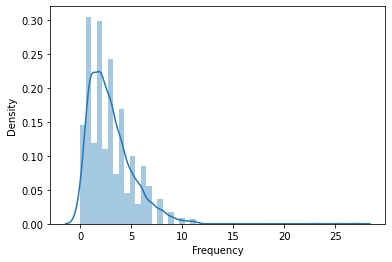

In [20]:
import seaborn as sns
x = df['Frequency']
ax = sns.distplot(x)

In [21]:
# def percent_rank(pd_series, value, precision):
#     return np.round((pd_series < value).astype(int).sum()/(len(pd_series) -1), precision) 

In [22]:
# Hitung RFM Score
df['R'] = 4-(pd.qcut(df['Recency'],4,labels=False))
df['F'] = pd.qcut(df['Frequency'],4,labels=False)+1
df['M'] = pd.qcut(df['Monetary'],4,labels=False)+1
df['RFMScore']=df.R.map(str)+df.F.map(str)+df.M.map(str)
df['RFMTotal'] = df[['R','F','M']].sum(axis=1)

In [23]:
# segmentasi berdasar RFM
def top_score(RFM):
    R = str(RFM[0])
    F = str(RFM[1])
    M = str(RFM[2])
    # classification for >9
    if R+F+M=='444':
        return 'Top Tier'
    elif (int(R)>2) and ((F=='4') or (M=='4')) and (int(F)+int(M)>6) or R+M=='44':
        # (3-4)4(3-4), (3-4)(3-4)4 
        return 'Priority Member'
    elif (R=='4') and (int(F)>2):
        # 4(3-4)(2-3-4)
        return 'Loyal Member'
    elif (int(R)<=2) and (int(F)>2) and (int(M)>2):
        #(1-2)(3-4)(3-4)
        return 'At Risk'
    else:
        return 'General Member'

def mid_score(RFM):
    R = str(RFM[0])
    F = str(RFM[1])
    M = str(RFM[2])
    #classification for 6<x<9
    if (int(F)>2) and (int(M)>2):
        #(1-2-3)(3-4)(3-4)
        return 'At Risk'
    elif R+M in ['44','43','34']:
        return 'Priority Member'
    elif (R+F+M == '333') or (R+F in ['44','34','43']):
        # 4(3-4)(2-3-4)
        return 'Loyal Member'
    elif R=='4' and (int(F)<=2):
        return 'Fresh Member'
    elif (int(R)<=2) and (int(F)<=2):
        return 'Hibernating'
    else :
        return 'General Member'

def low_score(RFM):
    R = str(RFM[0])
    F = str(RFM[1])
    M = str(RFM[2])
    #classification for <6
    if R+F+M in ['111','112']:
        return 'Lost Cause'
    elif R=='4' and (int(F)<=2):
        return 'Fresh Member'
    elif (int(R)<=2) and (int(M)>2):
        return 'Hibernating'
    else :
        return 'General Member'

def RFM_Segmentation(loyalty,score):
    if loyalty == 3:
        return top_score(score)
    elif loyalty == 0:
        return low_score(score)
    elif loyalty <3 and loyalty>0:
        return mid_score(score)



In [24]:
# Label segmentasi konsumen berdasar RFM
df['Loyalty Level'] = pd.qcut(df.RFMTotal,q=4,labels=False)
df['Loyalty Level'] = df[['Loyalty Level','RFMScore']].apply(lambda x: RFM_Segmentation(*x),axis=1)

In [25]:
# df['Loyalty Level'].value_counts()
# df[df['Loyalty Level']=='General Member']
# len(df[df['Loyalty Level']=='General Member'])
# df[df['Loyalty Level']=='General Member']['RFMScore'].value_counts()

c:\Users\msing\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn-0.11.0-py3.9.egg\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


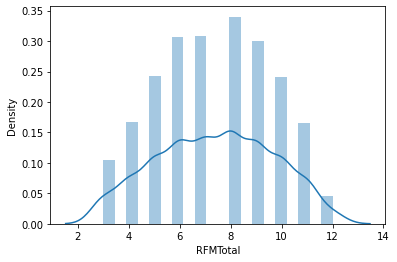

In [26]:
import seaborn as sns
x = df['RFMTotal']
ax = sns.distplot(x)

In [27]:
# df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']]=df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']].astype('category')

### - Global overview of dataset

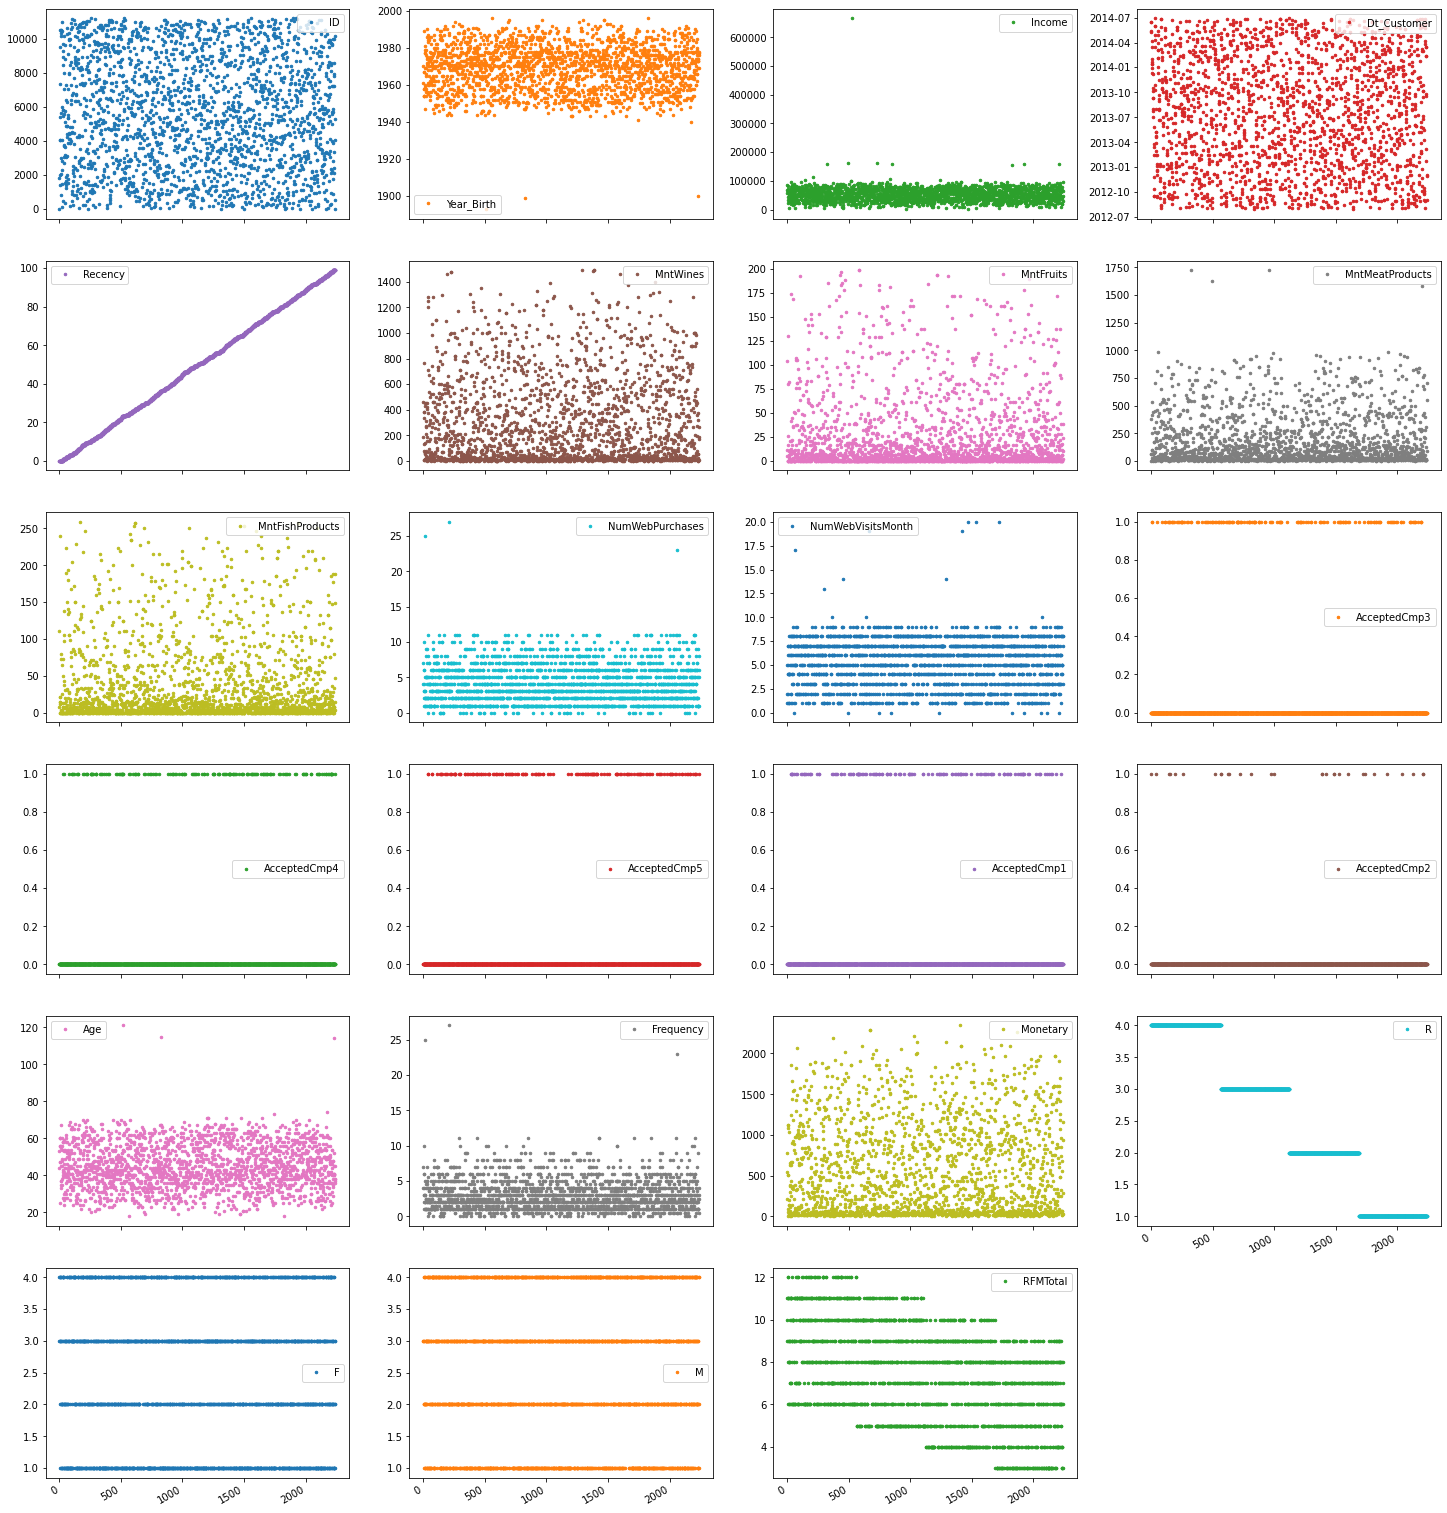

In [28]:
# Plot numerical data
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(25, 30), markersize=5);

- Filter out outliers

In [29]:
# Impute year birth error
df[df['Year_Birth']<1920]

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Age Group,Income Class,Frequency,Monetary,R,F,M,RFMScore,RFMTotal,Loyalty Level
513,11004,1893,2n Cycle,Single,60182,2014-05-17,23,8,0,5,...,Senior Citizens,A,1.0,20,4,1,1,411,6,Fresh Member
827,1150,1899,PhD,Together,83532,2013-09-26,36,755,144,562,...,Senior Citizens,A,4.0,1565,3,3,4,334,10,Priority Member
2233,7829,1900,2n Cycle,Divorced,36640,2013-09-26,99,15,6,8,...,Senior Citizens,A,2.0,36,1,2,1,121,4,General Member


In [30]:
df['Year_Birth'] = df['Year_Birth'].map(lambda x:x+90 if x<1920 else x)
df['Age'] = df['Year_Birth'].apply(age,args=(time_reference,))

In [31]:
# Impute income error
df[df['Income']>600000]


,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Age Group,Income Class,Frequency,Monetary,R,F,M,RFMScore,RFMTotal,Loyalty Level
527,9432,1977,Graduation,Together,666666,2013-06-02,23,9,14,18,...,Adults,A,1.5,49,4,1,1,411,6,Fresh Member


In [32]:
df['Income'] = df['Income'].map(lambda x:int(x*0.1) if x>600000 else x)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Education          2216 non-null   object        
 3   Marital_Status     2216 non-null   object        
 4   Income             2216 non-null   int64         
 5   Dt_Customer        2216 non-null   datetime64[ns]
 6   Recency            2216 non-null   int64         
 7   MntWines           2216 non-null   int64         
 8   MntFruits          2216 non-null   int64         
 9   MntMeatProducts    2216 non-null   int64         
 10  MntFishProducts    2216 non-null   int64         
 11  NumWebPurchases    2216 non-null   int64         
 12  NumWebVisitsMonth  2216 non-null   int64         
 13  AcceptedCmp3       2216 non-null   int64         
 14  Accepted

In [34]:
# Extract descriptive properties of non-numerical features
df.describe(exclude=["number", "datetime"])

,Education,Marital_Status,Age Group,Income Class,RFMScore,Loyalty Level
count,2216,2216,2216,2216,2216,2216
unique,5,5,4,4,61,8
top,Graduation,Married,Adults,A,311,General Member
freq,1116,857,1003,1633,112,696


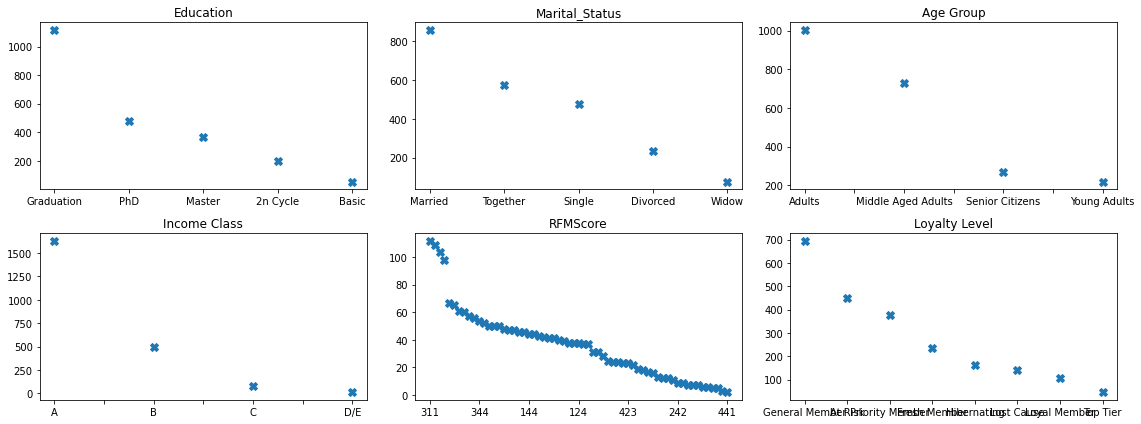

In [35]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,6))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    
    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=False, title=col, lw=0, marker="X", markersize=8, ax=ax)
    
plt.tight_layout();

### - Feature distribution

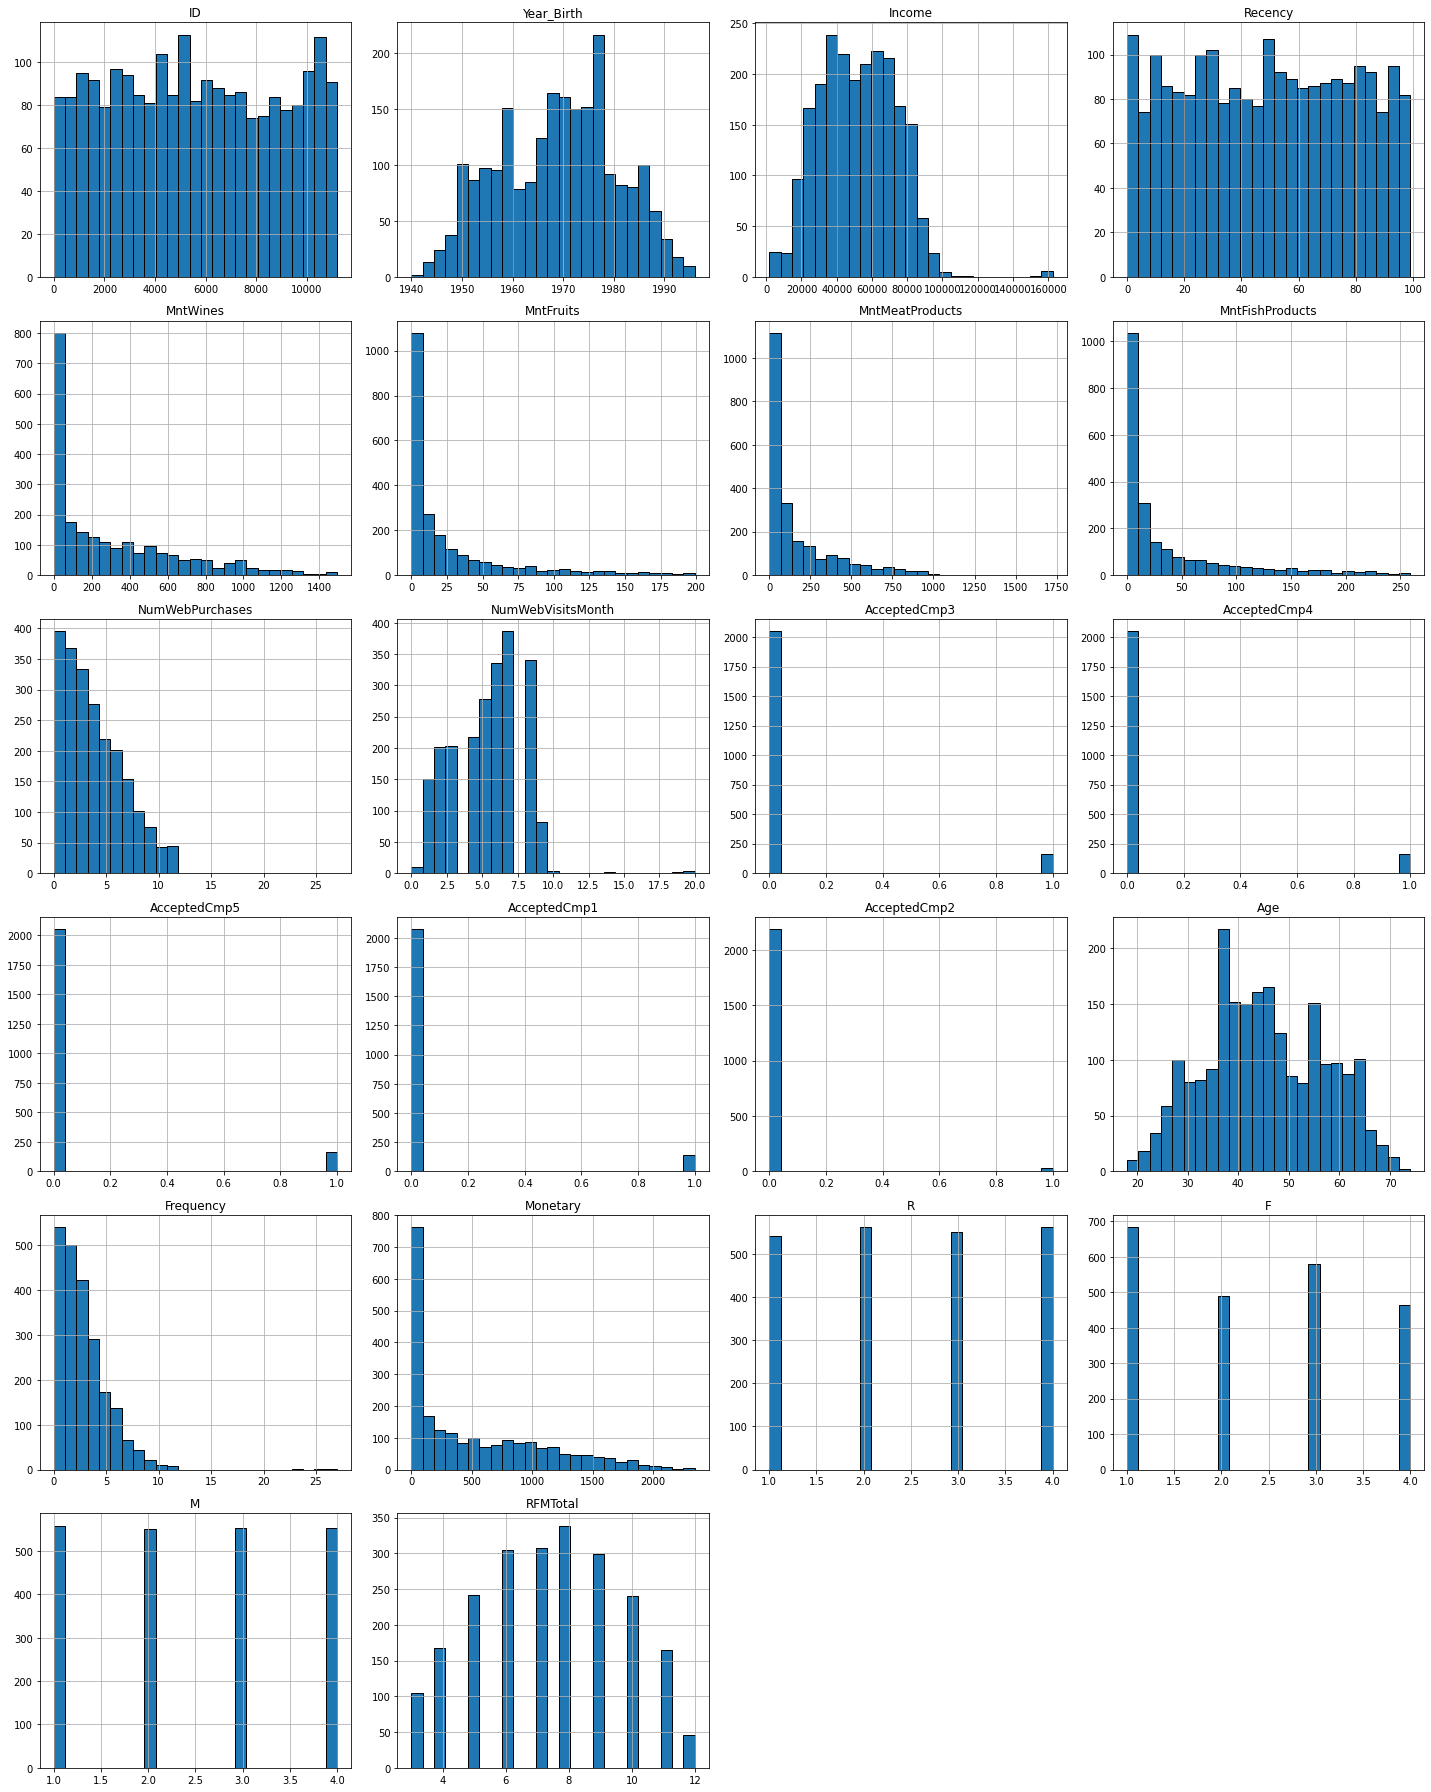

In [36]:
df.hist(bins=25, figsize=(20, 25), layout=(-1, 4), edgecolor="black")
plt.tight_layout();

ID              0.003159
Income Class    0.000451
Education       0.000451
AcceptedCmp3    0.000451
AcceptedCmp5    0.000451
AcceptedCmp1    0.000451
AcceptedCmp2    0.000451
Age Group       0.000451
AcceptedCmp4    0.000451
R               0.000451
dtype: float64

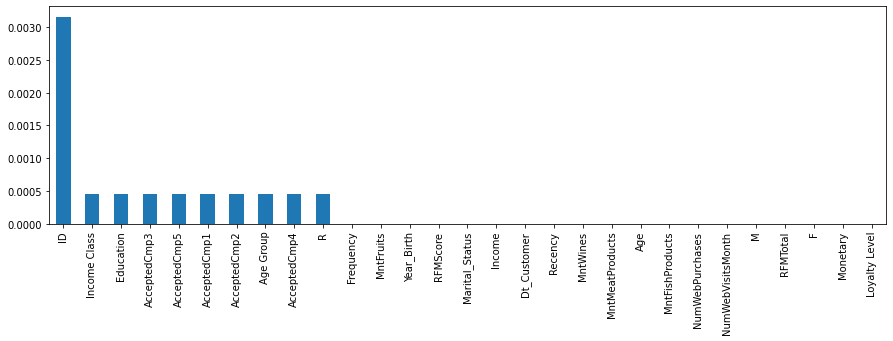

In [37]:
# Collects for each feature the most frequent entry
most_frequent_entry = df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head(10))

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

### - Feature pattern

In [38]:
# Creates mask to identify numerical features with more or less than 25 unique features (continuous values)
cols_continuous = df.select_dtypes(include="number").nunique() >= 15

In [39]:
# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(2216, 13)

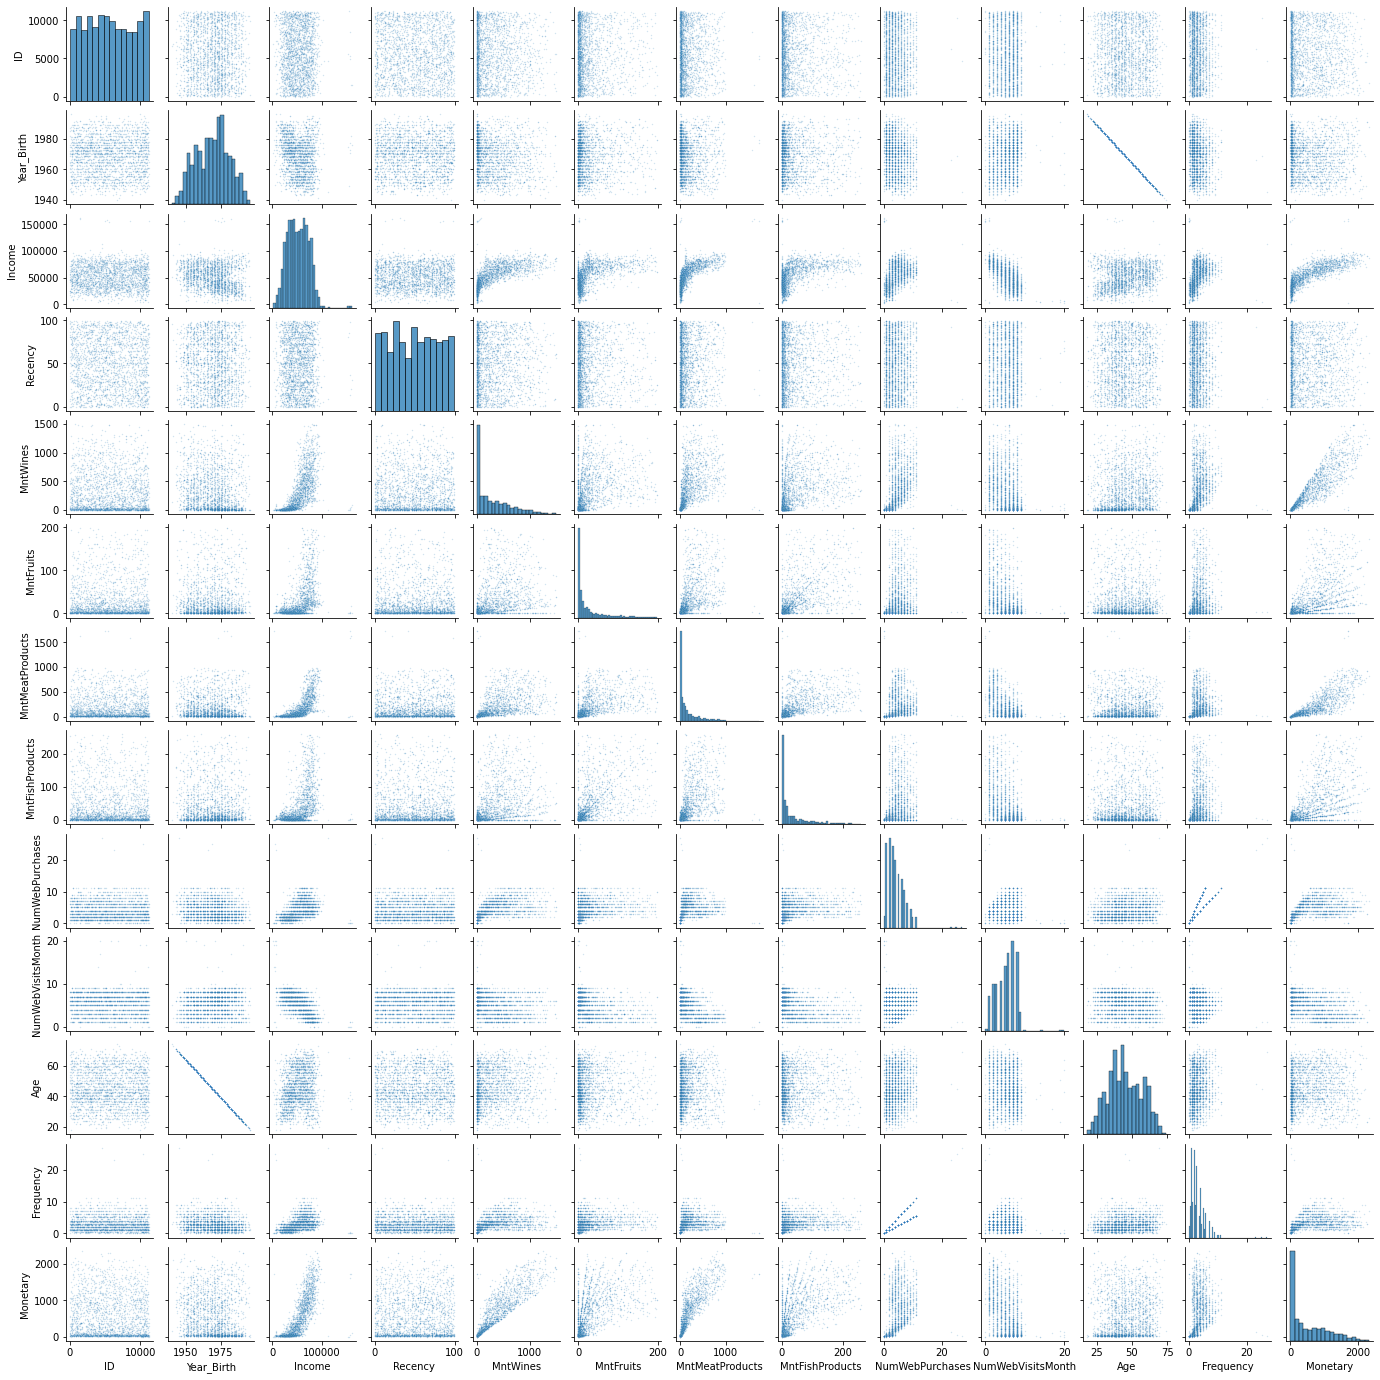

In [40]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

c:\Users\msing\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn-0.11.0-py3.9.egg\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\msing\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn-0.11.0-py3.9.egg\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


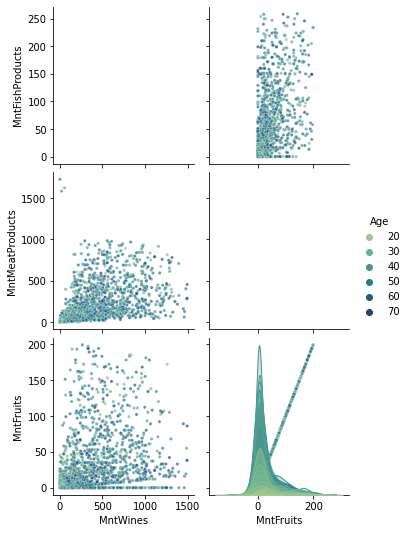

In [41]:
sns.pairplot(
    df, plot_kws={"s": 10, "alpha": 0.7}, palette="crest", hue="Age",
    x_vars=["MntWines","MntFruits"], y_vars=["MntFishProducts","MntMeatProducts","MntFruits"]);

In [42]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(2216, 9)

In [43]:
df_discrete.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,R,F,M,RFMTotal
0,0,0,0,0,0,4,3,3,10
1,0,0,0,0,1,4,4,3,11
2,0,0,0,0,0,4,3,2,9
3,0,0,0,0,0,4,1,1,6
4,1,0,0,0,0,4,3,2,9


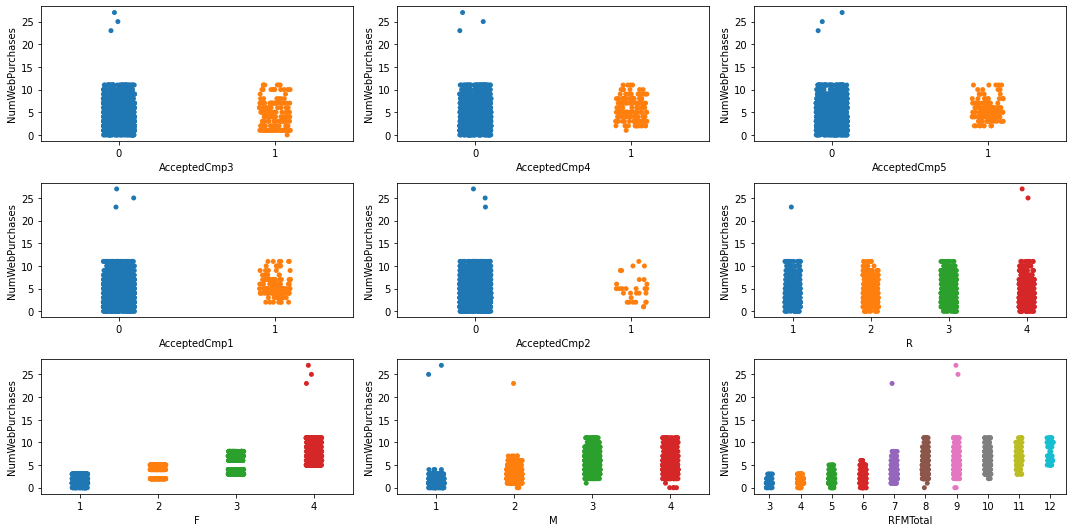

In [44]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 3
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df["NumWebPurchases"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows*2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=5, alpha=1)
plt.tight_layout();

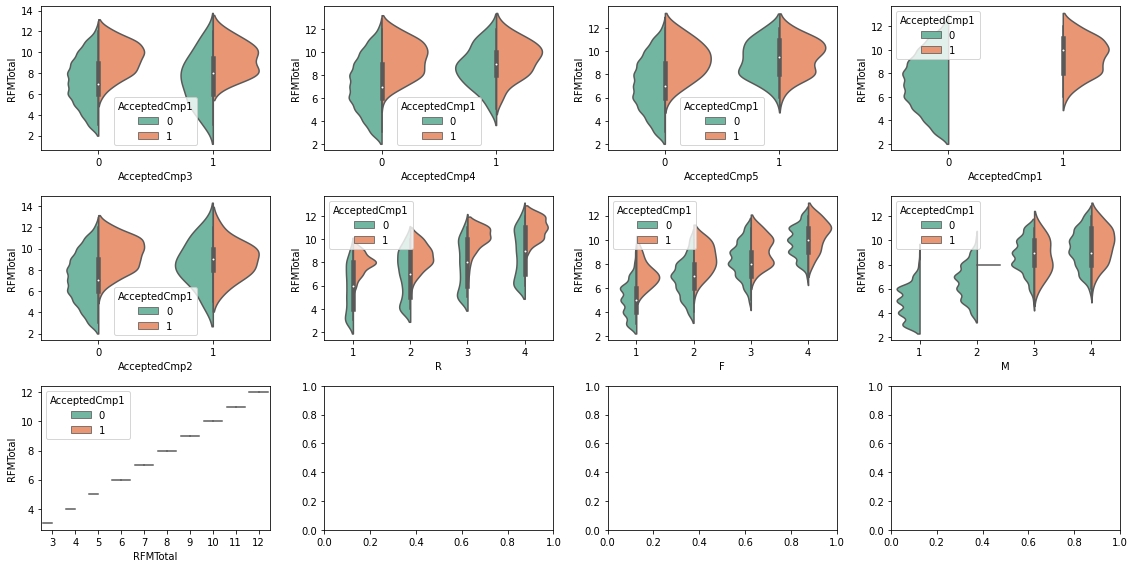

In [45]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Age`
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["RFMTotal"], palette="Set2",
                   split=True, hue="AcceptedCmp1", ax=ax)
plt.tight_layout();

### - Feature relationship

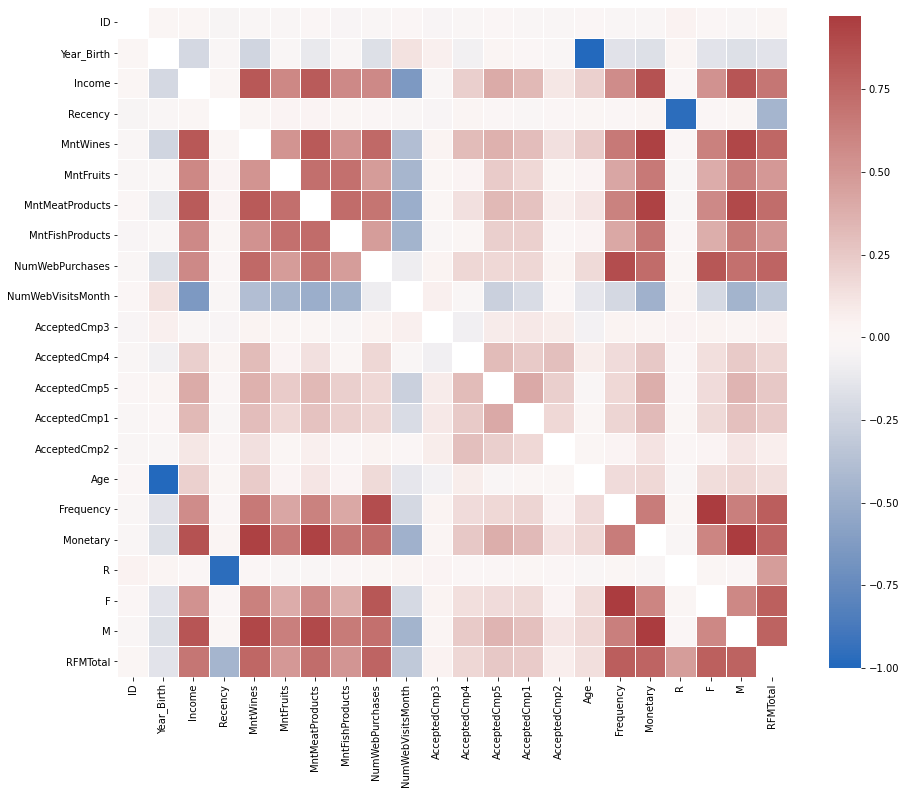

In [46]:
# Computes feature correlation
df_corr = df.corr(method="spearman")

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [47]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Age                Year_Birth          -1.000000
R                  Recency             -0.968277
NumWebVisitsMonth  Income              -0.644147
                   MntMeatProducts     -0.493880
Monetary           NumWebVisitsMonth   -0.471455
                                          ...   
M                  MntWines             0.917546
Monetary           MntMeatProducts      0.939586
                   MntWines             0.945943
M                  Monetary             0.968251
F                  Frequency            0.972042
Length: 231, dtype: float64

In [48]:
df.corrwith(df["Income"]).sort_values()

NumWebVisitsMonth   -0.650398
Year_Birth          -0.198488
AcceptedCmp3        -0.015371
R                   -0.004593
ID                   0.000429
Recency              0.006666
AcceptedCmp2         0.103862
Age                  0.198488
AcceptedCmp4         0.219223
AcceptedCmp1         0.327047
AcceptedCmp5         0.396436
Frequency            0.427874
NumWebPurchases      0.458626
F                    0.487819
MntFruits            0.507799
MntFishProducts      0.520095
RFMTotal             0.629824
MntWines             0.687807
MntMeatProducts      0.692119
Monetary             0.787689
M                    0.801503
Income               1.000000
dtype: float64

In [49]:
df.corrwith(df["Age"]).sort_values()

Year_Birth          -1.000000
NumWebVisitsMonth   -0.118272
AcceptedCmp3        -0.060293
R                   -0.022706
AcceptedCmp5        -0.021223
ID                  -0.005846
AcceptedCmp2         0.008093
MntFruits            0.011977
AcceptedCmp1         0.012557
Recency              0.015361
MntMeatProducts      0.033338
MntFishProducts      0.041045
AcceptedCmp4         0.070592
Monetary             0.118748
Frequency            0.146332
RFMTotal             0.146970
F                    0.152970
NumWebPurchases      0.163272
MntWines             0.164581
M                    0.169219
Income               0.198488
Age                  1.000000
dtype: float64

In [50]:
df.head().T

,0,1,2,3,4
ID,1826,1,10476,1386,5371
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,84835,57091,67267,32474,21474
Dt_Customer,2014-06-16 00:00:00,2014-06-15 00:00:00,2014-05-13 00:00:00,2014-05-11 00:00:00,2014-04-08 00:00:00
Recency,0,0,0,0,0
MntWines,189,464,134,10,6
MntFruits,104,5,11,0,16
MntMeatProducts,379,64,59,1,24


In [51]:
df['Recency'].quantile([.25,.50,.75])

0.25    24.0
0.50    49.0
0.75    74.0
Name: Recency, dtype: float64

In [52]:
# df.to_csv('marketing_data-RFM-1.csv')

In [53]:
df['Web Conversion Rate'] = df['NumWebPurchases']/df['NumWebVisitsMonth']

In [54]:
df.rename(columns={'Loyalty Level':'Customer Segmentation'},inplace=True)
df.head().T

,0,1,2,3,4
ID,1826,1,10476,1386,5371
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,84835,57091,67267,32474,21474
Dt_Customer,2014-06-16 00:00:00,2014-06-15 00:00:00,2014-05-13 00:00:00,2014-05-11 00:00:00,2014-04-08 00:00:00
Recency,0,0,0,0,0
MntWines,189,464,134,10,6
MntFruits,104,5,11,0,16
MntMeatProducts,379,64,59,1,24


In [55]:
def purchase(status,visit,purchase):
    if status:
        return purchase/visit
    else:
        return None

In [56]:
df2 = df[['ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts']]
df2 = df2.melt(id_vars=['ID'],var_name='Item',value_name='Amount')
df2 = df2.replace(['MntWines','MntFruits','MntMeatProducts','MntFishProducts'],['Wine','Fruit','Meat','Fish'])

df3 = df[['ID','NumWebPurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']]
df3 = df3.melt(id_vars=['ID','NumWebPurchases','NumWebVisitsMonth'],var_name='Campaign Number',value_name='Status')
df3 = df3.replace(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'],['3rd','4th','5th','1st','2nd'])
df3['WebConversionPerCampaign'] = df3[['Status','NumWebVisitsMonth','NumWebPurchases']].apply(lambda x: purchase(*x), axis=1)

merged = df2.merge(df3, how='outer', on=['ID'])
merged.to_csv('item-and-campaign.csv',index=False)

In [57]:
merged

,ID,Item,Amount,NumWebPurchases,NumWebVisitsMonth,Campaign Number,Status,WebConversionPerCampaign
0,1826,Wine,189,4,1,3rd,0,NaN
1,1826,Wine,189,4,1,4th,0,NaN
2,1826,Wine,189,4,1,5th,0,NaN
3,1826,Wine,189,4,1,1st,0,NaN
4,1826,Wine,189,4,1,2nd,0,NaN
...,...,...,...,...,...,...,...,...
44315,4070,Fish,188,8,7,3rd,0,NaN
44316,4070,Fish,188,8,7,4th,1,1.142857
44317,4070,Fish,188,8,7,5th,1,1.142857
44318,4070,Fish,188,8,7,1st,0,NaN


In [58]:
merged.groupby(by=['Campaign Number'])['Status'].value_counts()

Campaign Number  Status
1st              0         8296
                 1          568
2nd              0         8744
                 1          120
3rd              0         8212
                 1          652
4th              0         8208
                 1          656
5th              0         8216
                 1          648
Name: Status, dtype: int64

In [59]:
df = df.drop(['Year_Birth','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'],axis=1)
df.head().T

,0,1,2,3,4
ID,1826,1,10476,1386,5371
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,84835,57091,67267,32474,21474
Recency,0,0,0,0,0
NumWebPurchases,4,7,3,1,3
NumWebVisitsMonth,1,5,2,7,7
Age,44,53,56,47,25
Age Group,Adults,Middle Aged Adults,Middle Aged Adults,Middle Aged Adults,Young Adults
Income Class,A,A,A,B,B


In [60]:
df['Customer Segmentation'].value_counts(normalize=True)

General Member     0.314079
At Risk            0.202617
Priority Member    0.169675
Fresh Member       0.106498
Hibernating        0.073556
Lost Cause         0.064079
Loyal Member       0.048736
Top Tier           0.020758
Name: Customer Segmentation, dtype: float64

In [61]:
df.to_csv('marketing_data-RFM-trim.csv')